In [19]:
%load_ext autoreload
%autoreload 2
import os
import sys
import mne
import numpy as np
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from cerebra_atlas_python.cerebra import CerebrA, setup_logging
from cerebra_atlas_python.plotting import  plot_brain_slice_2D, get_cmap

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

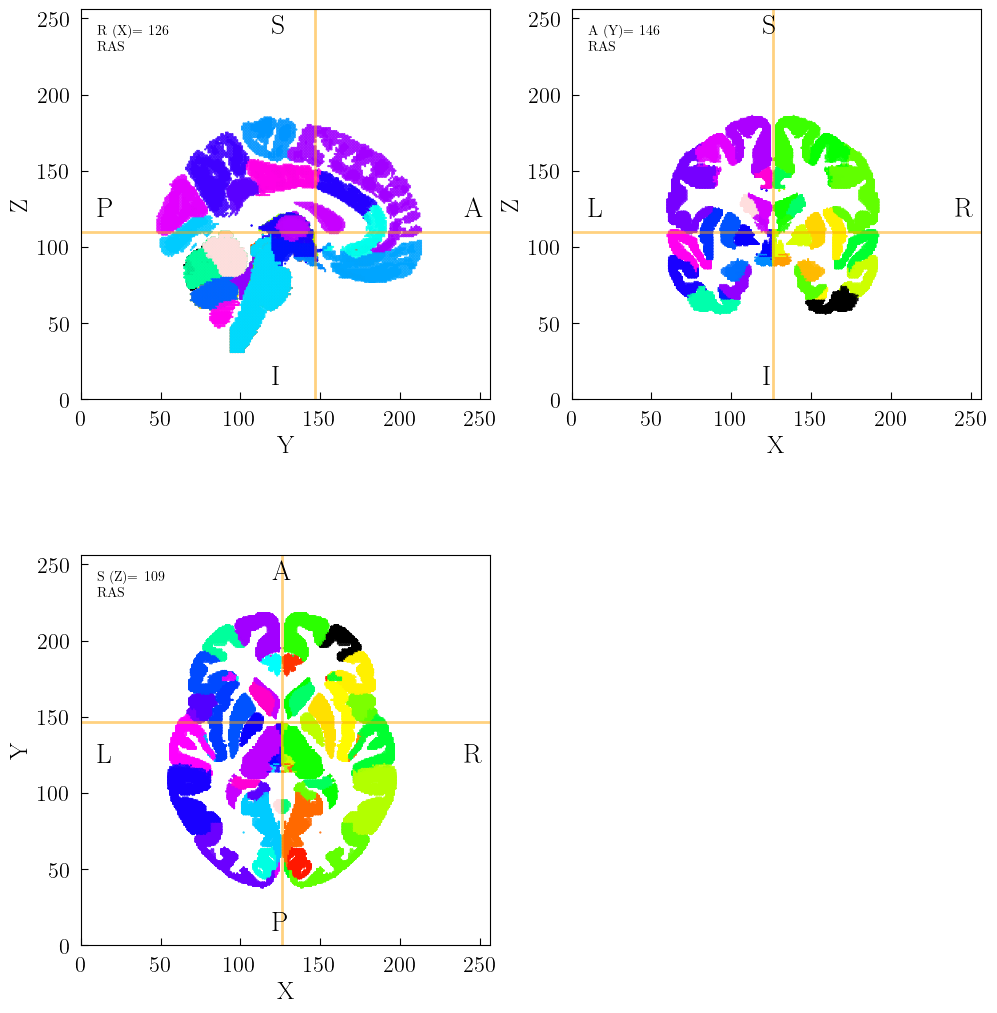

In [21]:
setup_logging(level="INFO")
cerebra = CerebrA()
cerebra.orthoview(plot_affine=True, plot_whitematter=False)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

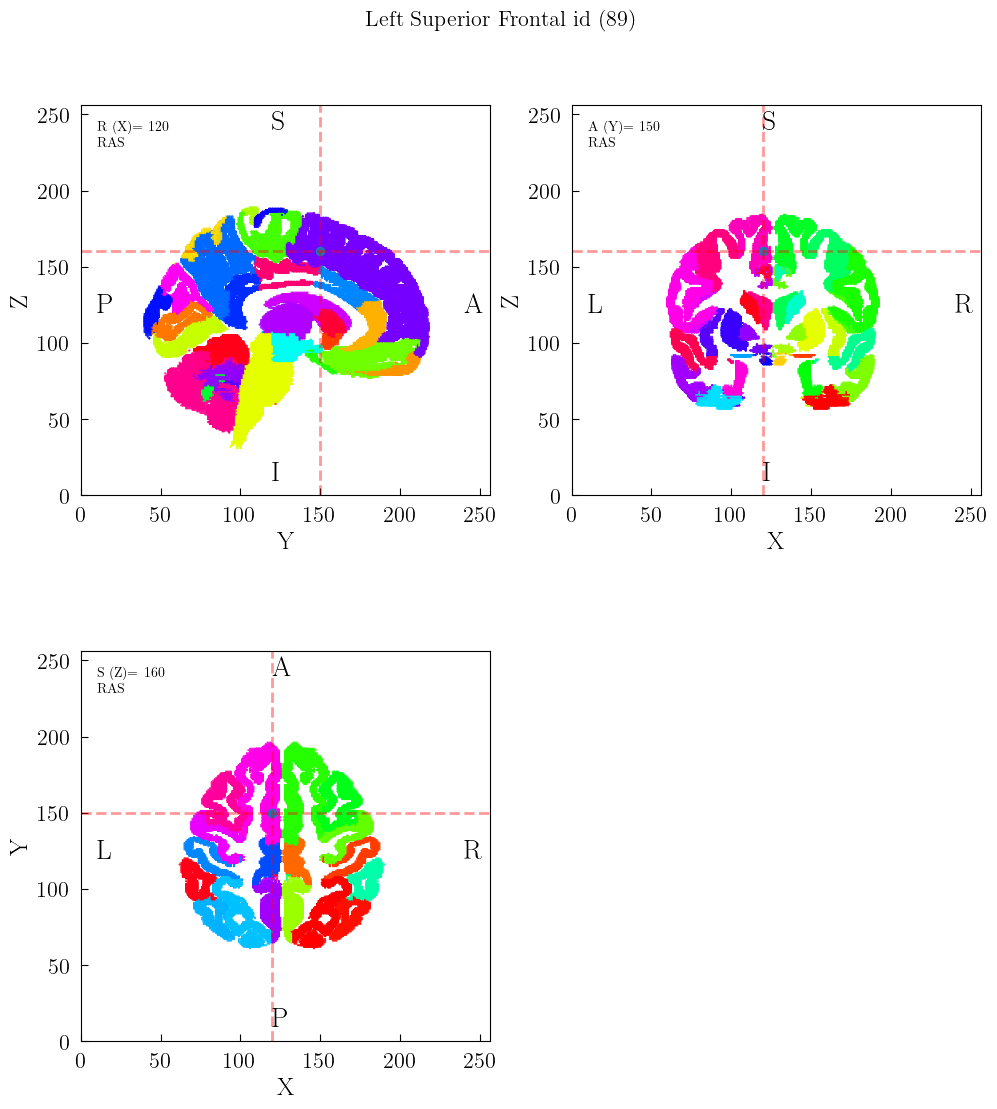

In [4]:
cerebra.orthoview(pt=[120, 150, 160])

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

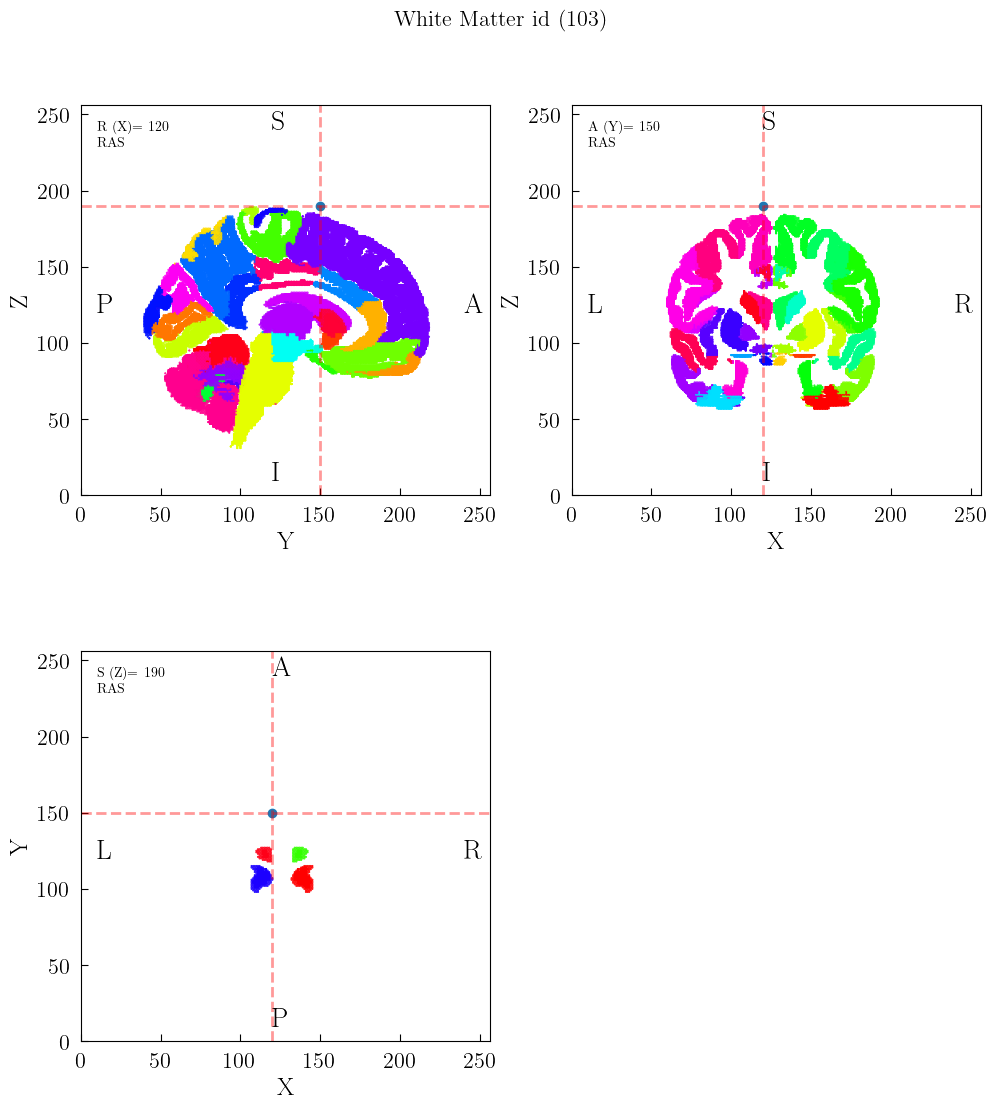

In [11]:
cerebra.orthoview(pt=[120, 150, 190])

In [16]:
cerebra.get_closest_region_to_whitematter(pt=[120, 150, 190])

(array([115, 145, 185]), 89)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

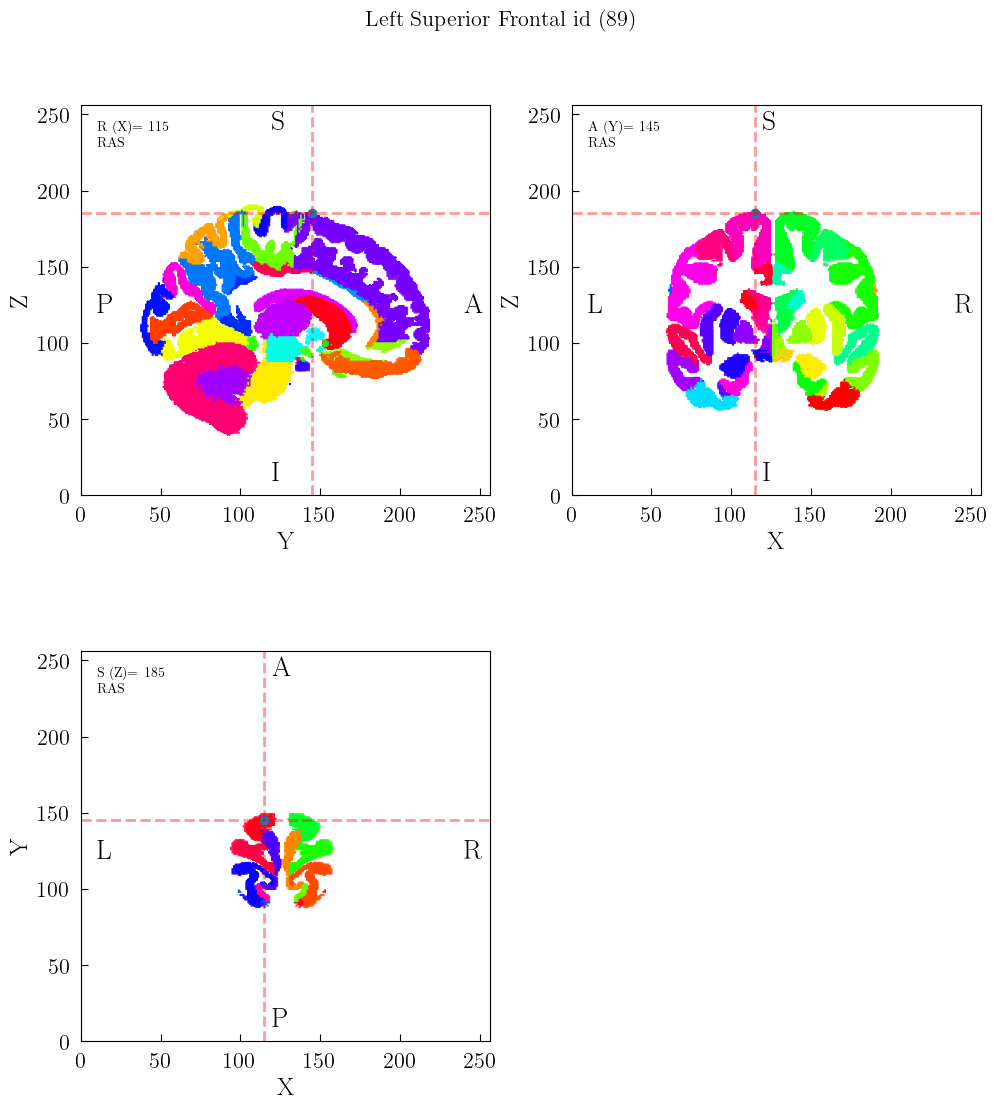

In [17]:
cerebra.orthoview(pt=[115, 145, 185])

In [4]:
%matplotlib qt

In [ ]:
cerebra.orthoview(pt=cerebra.voxel_to_ras([50, -77, 3]))
pass

In [ ]:
cerebra.plot_region_orthoview(region_id=29)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [ ]:
cerebra.orthoview(cmap_name="gray")

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [ ]:
cerebra.plot_region_orthoview(region_id=89)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [ ]:
cerebra.plot_region_orthoview(region_id=89-51)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [5]:
%matplotlib qt
cerebra.plot_3d()

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

In [ ]:
cerebra.plot_region_3d(29)

/home/carlos/Carlos/cerebra-atlas-python/cerebra_atlas_python/plotting.py:190: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs, ys, zs, c=cs, cmap=cmap, alpha=0.01 if region_pts is not None else 1)
